In [ ]:
!pip install pythainlp 

     |████████████████████████████████| 11.5 MB 4.3 MB/s 


In [ ]:
import tensorflow as tf
Model = tf.keras.models.Model
ModelCheckpoint = tf.keras.callbacks.ModelCheckpoint
ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau
load_model = tf.keras.models.load_model

import pandas as pd
import re
from pythainlp.tokenize import word_tokenize, Tokenizer
KRTokenizer = tf.keras.preprocessing.text.Tokenizer

pad_sequences = tf.keras.preprocessing.sequence.pad_sequences
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, LSTM, Bidirectional, Embedding, Dropout, BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.optimizers import Adam

import seaborn as sn
import matplotlib.pyplot as plt

import pickle as p
import plotly
import plotly.graph_objs as go

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

import os
import string
from os import listdir
from string import punctuation
from os import listdir

#########################
from pythainlp.tokenize import word_tokenize #, Tokenizer
from pythainlp.corpus.common import thai_words

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

from pythainlp.corpus import thai_stopwords

from gensim.models import Word2Vec

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
EPOCHS = 500
BS = 32
DIMENSION = 100

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(os.getcwd())

/content


In [ ]:
data_path = 'drive/My Drive/source'
print(os.listdir(data_path))

['#โควิด19.csv', 'รวม.csv', 'tt.csv', 'รวมเพิ่ม.csv', 'FixeD.csv', 'fixedall.csv', '3121.csv', '2751.csv', '3193 with no รายงานสถานการณ์.csv', '6173.csv', 'no.csv', 'T1', '.ipynb_checkpoints', 'การรักษาเดือน 1 (11).csv', '10005.gsheet', '10005.csv', '9224.csv', '9224k.csv', '9224t.csv']


In [ ]:
filelist = os.listdir(data_path)

for filename in filelist:
  print(filename)

#โควิด19.csv
รวม.csv
tt.csv
รวมเพิ่ม.csv
FixeD.csv
fixedall.csv
3121.csv
2751.csv
3193 with no รายงานสถานการณ์.csv
6173.csv
no.csv
T1
.ipynb_checkpoints
การรักษาเดือน 1 (11).csv
10005.gsheet
10005.csv
9224.csv
9224k.csv
9224t.csv


In [ ]:
file_name = data_path+'/10005.csv'
file_name

'drive/My Drive/source/10005.csv'

In [ ]:
df = pd.read_csv(file_name,encoding ='utf-8',  usecols=[0,1] ,names=['sentence','sentiment'], header=0)

In [ ]:
df.head()

,sentence,sentiment
0,#ม็อบ10กุมภา ตำรวจประกาศให้ยุติการชุม!! #เรื่อ...,ไม่เดือดร้อน
1,@babyfforfaii นานแล้ว ตั้งแต่ม้อบรอบแรกๆ ตั้งแ...,ไม่เดือดร้อน
2,@fishho213 ทุกครั้งก็ไม่มีใครติดโควิดมาจากม็อบ...,ไม่เดือดร้อน
3,@guangne @SabaiFreedom ด่ากันไป\nดูผลงานลุงตู่...,ไม่เดือดร้อน
4,@phoom91 นานาจิตตัง โลกนี้เป๋าธรรมดา\nถ้าเป็นน...,ไม่เดือดร้อน


In [ ]:
df.sample

<bound method NDFrame.sample of                                                 sentence     sentiment
0      #ม็อบ10กุมภา ตำรวจประกาศให้ยุติการชุม!! #เรื่อ...  ไม่เดือดร้อน
1      @babyfforfaii นานแล้ว ตั้งแต่ม้อบรอบแรกๆ ตั้งแ...  ไม่เดือดร้อน
2      @fishho213 ทุกครั้งก็ไม่มีใครติดโควิดมาจากม็อบ...  ไม่เดือดร้อน
3      @guangne @SabaiFreedom ด่ากันไป\nดูผลงานลุงตู่...  ไม่เดือดร้อน
4      @phoom91 นานาจิตตัง โลกนี้เป๋าธรรมดา\nถ้าเป็นน...  ไม่เดือดร้อน
...                                                  ...           ...
9999   ขอขอบคุณคุณลูกค้าทุกท่านที่มาอุดหนุนคะ🥰🥰🥰พบกัน...  ไม่เดือดร้อน
10000  วิธี ใช้เครื่องพ่นไอน้ำ ขจัดโควิด 19\nhttps://...  ไม่เดือดร้อน
10001               @UptoSZ เวลคัม โควิด มหาสารคาม 55555     เดือดร้อน
10002  ที่จริงปีนี้แปลนต้องจัดมีตวันเกิดนะ​ โควิดเมื่...     เดือดร้อน
10003  โรงแรม เคยู โฮม ใน มหาวิทยาลัยเกษตรศาสตร์\n\nแ...  ไม่เดือดร้อน

[10004 rows x 2 columns]>

In [ ]:
df = df.drop_duplicates()

In [ ]:
เดือดร้อน_df = df[df.sentiment == "เดือดร้อน"]
เดือดร้อน_df.head()

,sentence,sentiment
8,@TLHR2014 @ItsMinute เมื่อไหร่จะหมดโควิด อยากไ...,เดือดร้อน
12,ฉันผุ้อดสูกับแฮชแทกนี้ #ไม่สู้ก็อยู่อย่างไทย เ...,เดือดร้อน
14,ทำไมเมื่อวานถึงปล่อยให้มีคนพม่ามาประท้วงกันที่...,เดือดร้อน
16,บ้านพ่อมึงซื้อทิชชู่เป็นหมื่นล้านเหรอ สติปัญญา...,เดือดร้อน
17,บ้าไปแล้ว 1.เรื่องการจับกุมแกนนำม๊อบ พวกเขาทำผ...,เดือดร้อน


In [ ]:
print(len(เดือดร้อน_df))

3677


In [ ]:
ไม่เดือดร้อน_df = df[df.sentiment == "ไม่เดือดร้อน"].sample(3677)
ไม่เดือดร้อน_df.head()

,sentence,sentiment
2740,อัปเดตสถานการณ์ #โควิด19 วันนี้ (26 มิ.ย. 64) ...,ไม่เดือดร้อน
1303,ล่าสุดต่อประกันโควิด,ไม่เดือดร้อน
8399,สถานการณ์การติดเชื้อ COVID-19 ในประเทศ วันที่ ...,ไม่เดือดร้อน
8647,ด่วน! \n\n22:38 ศูนย์ปฏิบัติการ COVID-19 จังหว...,ไม่เดือดร้อน
2436,@vanishkul นิวซีแลนด์มีประชากร 7 ล้าน ยังฉีดวั...,ไม่เดือดร้อน


In [ ]:
sentiment_df = pd.concat([ไม่เดือดร้อน_df, เดือดร้อน_df])
sentiment_df.sample(10)

,sentence,sentiment
8074,คิดถึงพี่น้องน้ำ 😊🥰🤟❤😷😷\nป.โทจะไม่จบเพราะดูแต่...,ไม่เดือดร้อน
2408,สถานการณ์การติดเชื้อโควิด-19 ในประเทศ วันที่ 1...,ไม่เดือดร้อน
9844,ทำงานรอกันด้วยค่ะเพื่อน\n\n#งานก็ต้องค้องทำ#โค...,ไม่เดือดร้อน
4848,อยากฉีด #โมเดอร์นา ฟรี!!!! \n⚠FREE⚠,เดือดร้อน
2436,@vanishkul นิวซีแลนด์มีประชากร 7 ล้าน ยังฉีดวั...,ไม่เดือดร้อน
8201,ถ้าไม่มีโควิดคือทั้งพี่ทั้งน้องต้องปังมากแน่ๆ....,ไม่เดือดร้อน
5088,@onmyworlds เราก็เห็นด้วยนะคะ บางคนคือรอนานจนข...,ไม่เดือดร้อน
1875,นักศึกษาหอบ-ตรวจพบเชื้อโควิดสายพันธุ์อินเดีย-เ...,เดือดร้อน
3024,ตั้งแต่มีโรคโควิดเข้ามา กลายเป็นคนอยู่ติดบ้าน ...,ไม่เดือดร้อน
6958,เหนื่อยใจกับการบริหารจัดการ สงสารคนในเรือนจำ ถ...,เดือดร้อน


In [ ]:
sentiment_df['clean_sentence'] = sentiment_df['sentence'].fillna('').apply(lambda x: x.lower())
sentiment_df.sample(5)

,sentence,sentiment,clean_sentence
2568,@missPM92 กลัวโควิด😆😆😆,เดือดร้อน,@misspm92 กลัวโควิด😆😆😆
8208,ชีวิตไม่มีไรเลยนะช่วงนี้มีแต่กักตัวตรวจโควิด,เดือดร้อน,ชีวิตไม่มีไรเลยนะช่วงนี้มีแต่กักตัวตรวจโควิด
323,สาระน่ารู้” 8ขั้นตอน ฉีดวัคซีนโควิด-19 ภายใน 3...,ไม่เดือดร้อน,สาระน่ารู้” 8ขั้นตอน ฉีดวัคซีนโควิด-19 ภายใน 3...
7656,คือเป็นไรกะฟ้าทลายโจรเบ๋อ คือนี่ไม่สั่งให้คนไข...,ไม่เดือดร้อน,คือเป็นไรกะฟ้าทลายโจรเบ๋อ คือนี่ไม่สั่งให้คนไข...
2952,@PlsBemyself โควิดหายแล้วเราเจอกัน,ไม่เดือดร้อน,@plsbemyself โควิดหายแล้วเราเจอกัน


In [ ]:
pun = '"#\'()*,-.;<=>[\\]^_`{|}~'
pun

'"#\'()*,-.;<=>[\\]^_`{|}~'

In [ ]:
sentiment_df['clean_sentence'] = sentiment_df['clean_sentence'].str.replace(r'[%s]' % (pun), '', regex=True)

In [ ]:
sentiment_df.sample(5)

,sentence,sentiment,clean_sentence
5681,ศบค.เผยไทยติดเชื้อโควิด-19 เพิ่ม 90 ราย ยอดสะส...,ไม่เดือดร้อน,ศบคเผยไทยติดเชื้อโควิด19 เพิ่ม 90 ราย ยอดสะสม ...
6980,เรามีช่อง​ทางกลับบ้านแบบปลอดภัยต่อตัวเองและคนร...,เดือดร้อน,เรามีช่อง​ทางกลับบ้านแบบปลอดภัยต่อตัวเองและคนร...
5583,ต้องแมสนะคะ ป้องกันโควิด น้องวินอย่าลืมใส่แมสน...,ไม่เดือดร้อน,ต้องแมสนะคะ ป้องกันโควิด น้องวินอย่าลืมใส่แมสน...
9659,พูดกันตามตรงก็คืออยากเห็นเค้าเล่นซีรี่ย์จีน หว...,ไม่เดือดร้อน,พูดกันตามตรงก็คืออยากเห็นเค้าเล่นซีรี่ย์จีน หว...
7026,บำบัดความเงี่ยนกัน​ ช่วงโควิด​\nหากเป็นคุณจะเล...,ไม่เดือดร้อน,บำบัดความเงี่ยนกัน​ ช่วงโควิด​\nหากเป็นคุณจะเล...


In [ ]:
custom_words_list = set(thai_words())
len(custom_words_list)

62051

In [ ]:
text = "โอเคบ่พวกเรารักภาษาบ้านเกิด" 
custom_tokenizer = Tokenizer(custom_words_list)
custom_tokenizer.word_tokenize(text)

['โอเค', 'บ่', 'พวกเรา', 'รัก', 'ภาษา', 'บ้านเกิด']

In [ ]:
sentiment_df['clean_sentence'] = sentiment_df['clean_sentence'].apply(lambda x: custom_tokenizer.word_tokenize(x))

In [ ]:
sentiment_df.sample(5)

,sentence,sentiment,clean_sentence
771,อยากไปเป็นครูอาสาบนดอยจัง ถ้าไม่ติดโควิดมันคงไ...,เดือดร้อน,"[อยาก, ไป, เป็น, ครู, อาสา, บน, ดอย, จัง, , ถ..."
5650,ยืนยันตัวเลขผู้ติดเชื้อ#โควิด19 ในประเทศไทยวั...,ไม่เดือดร้อน,"[ยืนยัน, ตัวเลข, ผู้, ติดเชื้อ, โควิด, 19, ,..."
695,มูลนิธิป่อเต็กตึ๊ง ส่งต่อธารน้ำใจ สู้ภัยโควิด-...,ไม่เดือดร้อน,"[มูลนิธิป่อเต็กตึ๊ง, , ส่งต่อ, ธาร, น้ำใจ, ,..."
5045,เอ่ออ... แต่โควิดก็เริ่มซาลง(มั้ง)และคือวันนี้...,ไม่เดือดร้อน,"[เอ่อ, อ, , แต่, โควิด, ก็, เริ่ม, ซาลง, มั้ง..."
8756,ด่วน! โควิดมากับเพื่อน\n\n13:08 ศูนย์ปฏิบัติกา...,ไม่เดือดร้อน,"[ด่วน, !, , โควิด, มา, กับ, เพื่อน, \n, \n, 1..."


In [ ]:
tokenized_doc = sentiment_df['clean_sentence']
tokenized_doc[:10]

2740    [อัปเดต, สถานการณ์,  , โควิด, 19,  , วันนี้,  ...
1303                         [ล่าสุด, ต่อ, ประกัน, โควิด]
8399    [สถานการณ์, การ, ติดเชื้อ,  , covid, 19,  , ใน...
8647    [ด่วน, !,  , \n, \n, 22, :, 38,  , ศูนย์ปฏิบัต...
2436    [@, vanishkul,  , นิวซีแลนด์, มี, ประชากร,  , ...
1344    [เช้านี้, อยู่, เกาะ,  , เตรียม, แมส, พร้อม, อ...
4189    [รอ, คิว, ตัดผม, ใน, ห้าง, โลตัส, ​,   , คิว, ...
8309    [@, popefc, 01,  , ดี, จัง, ผม, หนา,  , ทาง, น...
8137    [วันที่,  , 3,  , ตุลาคม,  , 2564, \n, ฮุก, 31...
4680    [รอบ, บ่าย,  , ลง, พื้นที่, ตรวจ, โควิด, \n, ร...
Name: clean_sentence, dtype: object

In [ ]:
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
tokenized_doc[:10]

2740    [อัปเดต, สถานการณ์,  , โควิด, 19,  , วันนี้,  ...
1303                         [ล่าสุด, ต่อ, ประกัน, โควิด]
8399    [สถานการณ์, การ, ติดเชื้อ,  , covid, 19,  , ใน...
8647    [ด่วน, !,  , \n, \n, 22, :, 38,  , ศูนย์ปฏิบัต...
2436    [@, vanishkul,  , นิวซีแลนด์, มี, ประชากร,  , ...
1344    [เช้านี้, อยู่, เกาะ,  , เตรียม, แมส, พร้อม, อ...
4189    [รอ, คิว, ตัดผม, ใน, ห้าง, โลตัส, ​,   , คิว, ...
8309    [@, popefc, 01,  , ดี, จัง, ผม, หนา,  , ทาง, น...
8137    [วันที่,  , 3,  , ตุลาคม,  , 2564, \n, ฮุก, 31...
4680    [รอบ, บ่าย,  , ลง, พื้นที่, ตรวจ, โควิด, \n, ร...
Name: clean_sentence, dtype: object

In [ ]:
tokenized_doc = tokenized_doc.to_list()

In [ ]:
# de-tokenization
detokenized_doc = []
for i in range(len(tokenized_doc)):
#     print(tokenized_doc[i])
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
    
sentiment_df['clean_sentence'] = detokenized_doc

In [ ]:
sentiment_df.head()

,sentence,sentiment,clean_sentence
2740,อัปเดตสถานการณ์ #โควิด19 วันนี้ (26 มิ.ย. 64) ...,ไม่เดือดร้อน,อัปเดต สถานการณ์ โควิด 19 วันนี้ 26 มิ...
1303,ล่าสุดต่อประกันโควิด,ไม่เดือดร้อน,ล่าสุด ต่อ ประกัน โควิด
8399,สถานการณ์การติดเชื้อ COVID-19 ในประเทศ วันที่ ...,ไม่เดือดร้อน,สถานการณ์ การ ติดเชื้อ covid 19 ในประเทศ ...
8647,ด่วน! \n\n22:38 ศูนย์ปฏิบัติการ COVID-19 จังหว...,ไม่เดือดร้อน,ด่วน ! \n \n 22 : 38 ศูนย์ปฏิบัติการ cov...
2436,@vanishkul นิวซีแลนด์มีประชากร 7 ล้าน ยังฉีดวั...,ไม่เดือดร้อน,@ vanishkul นิวซีแลนด์ มี ประชากร 7 ล้าน...


In [ ]:
cleaned_words = sentiment_df['clean_sentence'].to_list()

In [ ]:
cleaned_words[:1]

['อัปเดต สถานการณ์   โควิด 19   วันนี้   26   มิ ย   64    เสียชีวิต   51   ราย   ผู้ป่วย ใหม่ รวม   4161   ราย \n \n จำแนก เป็น \n ติดเชื้อ ใหม่   4089   ราย \n ติดเชื้อ ภายใน เรือนจำ / ที่ ต้อง ขัง   72   ราย \n หายป่วย กลับบ้าน   3569   ราย \n ผู้ป่วย สะสม   211589   ราย   ตั้งแต่   1   เมษายน   https :// tco / q 0 zvz 9 snw 7']

In [ ]:
def create_tokenizer(words, filters = ''):
    token = KRTokenizer()
    token.fit_on_texts(words)
    return token

In [ ]:
train_word_tokenizer = create_tokenizer(cleaned_words)
vocab_size = len(train_word_tokenizer.word_index) + 1

train_word_tokenizer.word_index

{'โควิด': 1,
 'https': 2,
 'tco': 3,
 '19': 4,
 'ไม่': 5,
 'ที่': 6,
 'ไป': 7,
 'ได้': 8,
 'มี': 9,
 'ก็': 10,
 '\u200b': 11,
 'จะ': 12,
 'มา': 13,
 'แล้ว': 14,
 'คน': 15,
 'ให้': 16,
 'ใน': 17,
 'ราย': 18,
 'เลย': 19,
 'เป็น': 20,
 'covid': 21,
 'ต้อง': 22,
 'วันนี้': 23,
 'แต่': 24,
 'และ': 25,
 'ติด': 26,
 'ๆ': 27,
 'นะ': 28,
 '1': 29,
 'ว่า': 30,
 'เรา': 31,
 'ของ': 32,
 'การ': 33,
 '2': 34,
 'ไทย': 35,
 'กัน': 36,
 'นี้': 37,
 '3': 38,
 'คือ': 39,
 'จาก': 40,
 'วัคซีน': 41,
 'อยู่': 42,
 '4': 43,
 'มาก': 44,
 'กับ': 45,
 'ยัง': 46,
 'ติดเชื้อ': 47,
 'มัน': 48,
 'ครับ': 49,
 'บ้าน': 50,
 '5': 51,
 'เพราะ': 52,
 '7': 53,
 'ตรวจ': 54,
 'ค่ะ': 55,
 'ดี': 56,
 '8': 57,
 '6': 58,
 'อีก': 59,
 'อยาก': 60,
 'ใหม่': 61,
 '9': 62,
 'ถ้า': 63,
 'วัน': 64,
 '0': 65,
 'ด้วย': 66,
 'ผู้ป่วย': 67,
 'ทำ': 68,
 'นวด': 69,
 'ประเทศ': 70,
 'ก่อน': 71,
 'ละ': 72,
 'หมด': 73,
 'อะไร': 74,
 'ผู้': 75,
 'ปี': 76,
 'กู': 77,
 'แบบ': 78,
 'นะคะ': 79,
 'สถานการณ์': 80,
 'กว่า': 81,
 'กลัว': 82,
 'ฉีด': 83,

In [ ]:
def max_length(words):
    return(len(max(words, key = len)))

In [ ]:
max_length = max_length(tokenized_doc)
max_length

128

In [ ]:
def encoding_doc(token, words):
    return(token.texts_to_sequences(words))

In [ ]:
encoded_doc = encoding_doc(train_word_tokenizer, cleaned_words)

In [ ]:
print(cleaned_words[0])
print(encoded_doc[0])

อัปเดต สถานการณ์   โควิด 19   วันนี้   26   มิ ย   64    เสียชีวิต   51   ราย   ผู้ป่วย ใหม่ รวม   4161   ราย 
 
 จำแนก เป็น 
 ติดเชื้อ ใหม่   4089   ราย 
 ติดเชื้อ ภายใน เรือนจำ / ที่ ต้อง ขัง   72   ราย 
 หายป่วย กลับบ้าน   3569   ราย 
 ผู้ป่วย สะสม   211589   ราย   ตั้งแต่   1   เมษายน   https :// tco / q 0 zvz 9 snw 7
[1306, 80, 1, 4, 23, 991, 333, 207, 113, 105, 1361, 18, 67, 61, 172, 3663, 18, 756, 20, 47, 61, 6271, 18, 47, 443, 469, 6, 22, 709, 1637, 18, 255, 292, 6272, 18, 67, 155, 6273, 18, 129, 29, 634, 2, 3, 315, 65, 6274, 62, 8801, 53]


In [ ]:
def padding_doc(encoded_doc, max_length):
    return(pad_sequences(encoded_doc, maxlen = max_length, padding = "post"))

In [ ]:
padded_doc = padding_doc(encoded_doc, max_length)
print("Shape of padded docs = ",padded_doc.shape)

print(cleaned_words[0])
print(encoded_doc[0])
print(padded_doc[0])

Shape of padded docs =  (7354, 128)
อัปเดต สถานการณ์   โควิด 19   วันนี้   26   มิ ย   64    เสียชีวิต   51   ราย   ผู้ป่วย ใหม่ รวม   4161   ราย 
 
 จำแนก เป็น 
 ติดเชื้อ ใหม่   4089   ราย 
 ติดเชื้อ ภายใน เรือนจำ / ที่ ต้อง ขัง   72   ราย 
 หายป่วย กลับบ้าน   3569   ราย 
 ผู้ป่วย สะสม   211589   ราย   ตั้งแต่   1   เมษายน   https :// tco / q 0 zvz 9 snw 7
[1306, 80, 1, 4, 23, 991, 333, 207, 113, 105, 1361, 18, 67, 61, 172, 3663, 18, 756, 20, 47, 61, 6271, 18, 47, 443, 469, 6, 22, 709, 1637, 18, 255, 292, 6272, 18, 67, 155, 6273, 18, 129, 29, 634, 2, 3, 315, 65, 6274, 62, 8801, 53]
[1306   80    1    4   23  991  333  207  113  105 1361   18   67   61
  172 3663   18  756   20   47   61 6271   18   47  443  469    6   22
  709 1637   18  255  292 6272   18   67  155 6273   18  129   29  634
    2    3  315   65 6274   62 8801   53    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0

In [ ]:
sentiment = sentiment_df['sentiment'].to_list()

In [ ]:
unique_sentiment = list(set(sentiment))
unique_sentiment

['ไม่เดือดร้อน', 'เดือดร้อน']

In [ ]:
['pos', 'neg']

output_tokenizer = create_tokenizer(unique_sentiment)

In [ ]:
encoded_output = encoding_doc(output_tokenizer, sentiment)
print(sentiment[0:2])
print(encoded_output[0:2])

['ไม่เดือดร้อน', 'ไม่เดือดร้อน']
[[1], [1]]


In [ ]:
encoded_output = np.array(encoded_output).reshape(len(encoded_output), 1)
encoded_output.shape

(7354, 1)

In [ ]:
def one_hot(encode):
  oh = OneHotEncoder(sparse = False)
  return(oh.fit_transform(encode))

In [ ]:
output_one_hot = one_hot(encoded_output)
print(encoded_output[0])
print(output_one_hot[0])

[1]
[1. 0.]


In [ ]:
train_X, val_X, train_Y, val_Y = train_test_split(padded_doc, output_one_hot, shuffle = True, test_size = 0.2, stratify=output_one_hot)

In [ ]:
print("Shape of train_X = %s and train_Y = %s" % (train_X.shape, train_Y.shape))
print("Shape of val_X = %s and val_Y = %s" % (val_X.shape, val_Y.shape))

Shape of train_X = (5883, 128) and train_Y = (5883, 2)
Shape of val_X = (1471, 128) and val_Y = (1471, 2)


In [ ]:
num_classes = len(unique_sentiment)

In [ ]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.0001)

In [ ]:
# define the model
def define_model(length, vocab_size):
    # channel 1
    inputs1 = tf.keras.layers.Input(shape=(length,))
    embedding1 = tf.keras.layers.Embedding(vocab_size, DIMENSION, trainable = True)(inputs1)
    conv1 = tf.keras.layers.Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
    drop1 = tf.keras.layers.Dropout(0.5)(conv1)
    pool1 = tf.keras.layers.MaxPooling1D(pool_size=2)(drop1)
    flat1 = tf.keras.layers.Flatten()(pool1)
    # channel 2
    inputs2 = tf.keras.layers.Input(shape=(length,))
    embedding2 = tf.keras.layers.Embedding(vocab_size, DIMENSION, trainable = True)(inputs2)
    conv2 = tf.keras.layers.Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
    drop2 = tf.keras.layers.Dropout(0.5)(conv2)
    pool2 = tf.keras.layers.MaxPooling1D(pool_size=2)(drop2)
    flat2 = tf.keras.layers.Flatten()(pool2)
    # channel 3
    inputs3 = tf.keras.layers.Input(shape=(length,))
    embedding3 = tf.keras.layers.Embedding(vocab_size, DIMENSION, trainable = True)(inputs3)
    conv3 = tf.keras.layers.Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
    drop3 = tf.keras.layers.Dropout(0.5)(conv3)
    pool3 = tf.keras.layers.MaxPooling1D(pool_size=2)(drop3)
    flat3 = tf.keras.layers.Flatten()(pool3)
    # merge
    merged = tf.keras.layers.concatenate([flat1, flat2, flat3])
    # interpretation
    dense1 = tf.keras.layers.Dense(10, activation='relu')(merged)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # compile
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    # summarize
    print(model.summary())
#     plot_model(model, show_shapes=True, to_file='multichannel.png')
    return model

In [ ]:
model = define_model(max_length, vocab_size)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 128, 100)     2269800     ['input_1[0][0]']                
                                                                                              

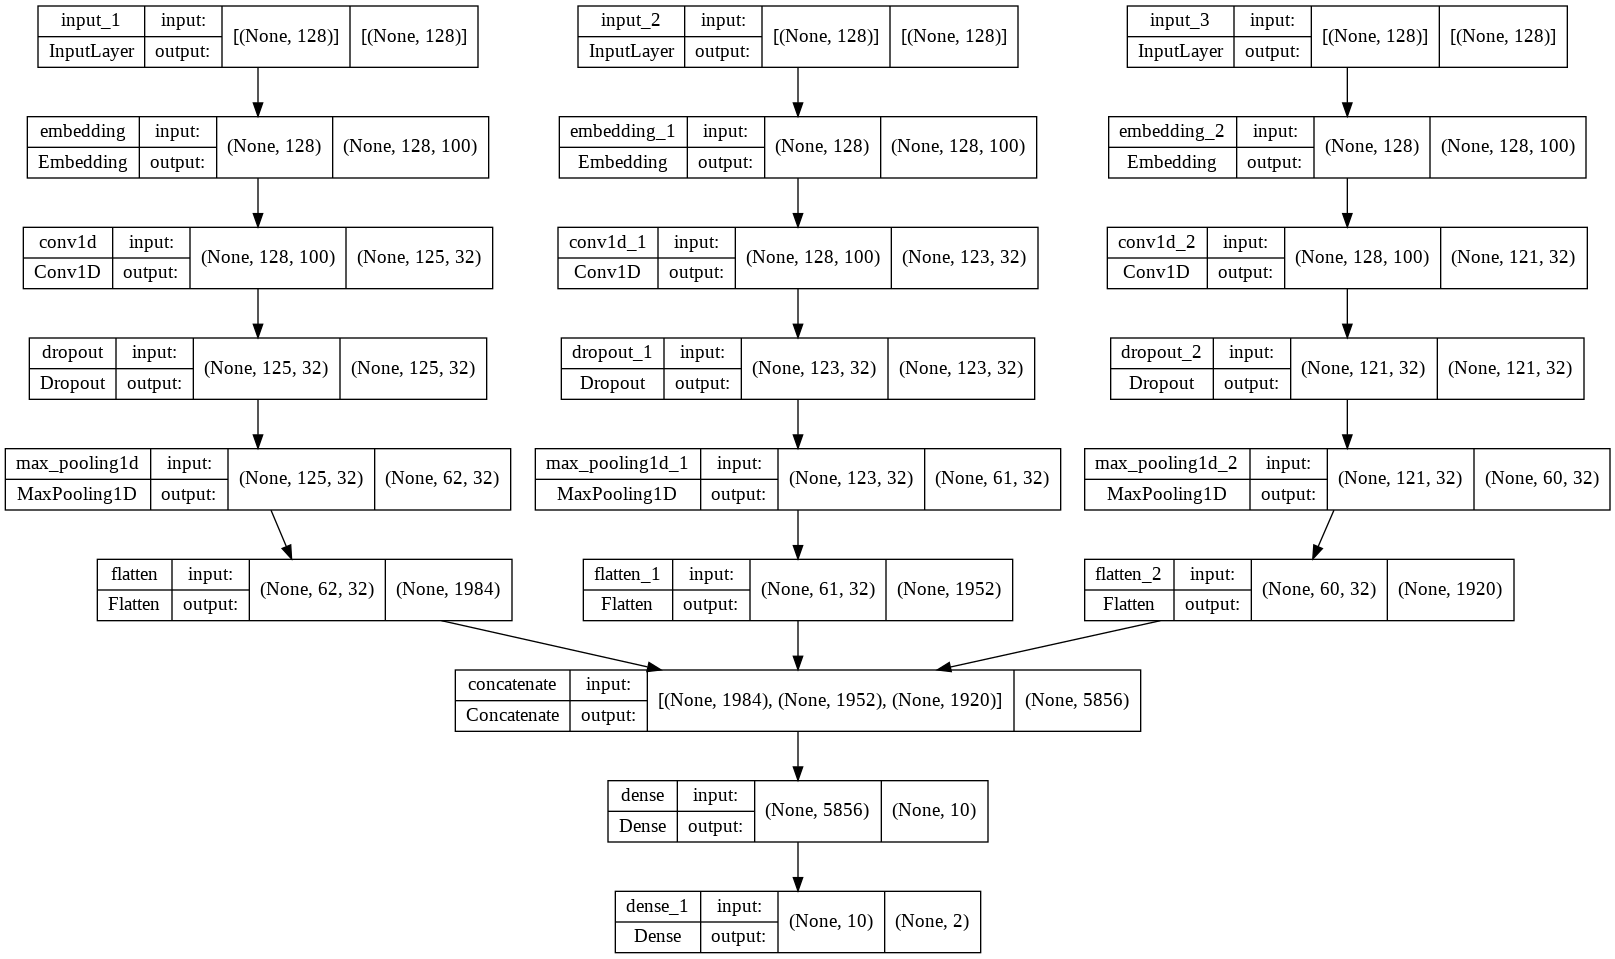

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
filename = 'model.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 3, verbose=1,factor=0.1, min_lr=0.000001)
callbacks_list = [checkpoint, learning_rate_reduction]

In [ ]:
hist = model.fit([train_X, train_X, train_X], train_Y, epochs = EPOCHS, batch_size = BS, validation_data = ([val_X, val_X, val_X], val_Y), callbacks = [callbacks_list], shuffle=True)

Epoch 1/500
184/184 [==============================] - ETA: 0s - loss: 0.6805 - accuracy: 0.5562
Epoch 1: val_loss improved from inf to 0.65647, saving model to model.h5
184/184 [==============================] - 12s 12ms/step - loss: 0.6805 - accuracy: 0.5562 - val_loss: 0.6565 - val_accuracy: 0.6220 - lr: 1.0000e-04
Epoch 2/500
182/184 [============================>.] - ETA: 0s - loss: 0.6229 - accuracy: 0.6549
Epoch 2: val_loss improved from 0.65647 to 0.58918, saving model to model.h5
184/184 [==============================] - 2s 11ms/step - loss: 0.6222 - accuracy: 0.6560 - val_loss: 0.5892 - val_accuracy: 0.7206 - lr: 1.0000e-04
Epoch 3/500
180/184 [============================>.] - ETA: 0s - loss: 0.5108 - accuracy: 0.7630
Epoch 3: val_loss improved from 0.58918 to 0.52232, saving model to model.h5
184/184 [==============================] - 2s 13ms/step - loss: 0.5104 - accuracy: 0.7627 - val_loss: 0.5223 - val_accuracy: 0.7580 - lr: 1.0000e-04
Epoch 4/500
181/184 [=============

In [ ]:
h1 = go.Scatter(y=hist.history['loss'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=hist.history['val_loss'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
h1 = go.Scatter(y=hist.history['accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=hist.history['val_accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
predict_model = load_model(filename) 
predict_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 128, 100)     2269800     ['input_1[0][0]']                
                                                                                              

In [ ]:
score = predict_model.evaluate([val_X, val_X, val_X], val_Y, verbose=0)
print('Validate loss:', score[0])
print('Validate accuracy:', score[1])

Validate loss: 0.4898039400577545
Validate accuracy: 0.7607070207595825


In [ ]:
predicted_classes = np.argmax(predict_model.predict([val_X, val_X, val_X]), axis=-1)
predicted_classes.shape

(1471,)

In [ ]:
y_true = np.argmax(val_Y,axis = 1)
print(val_Y[0])
print(y_true[0])

[0. 1.]
1


In [ ]:
cm = confusion_matrix(y_true, predicted_classes)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")

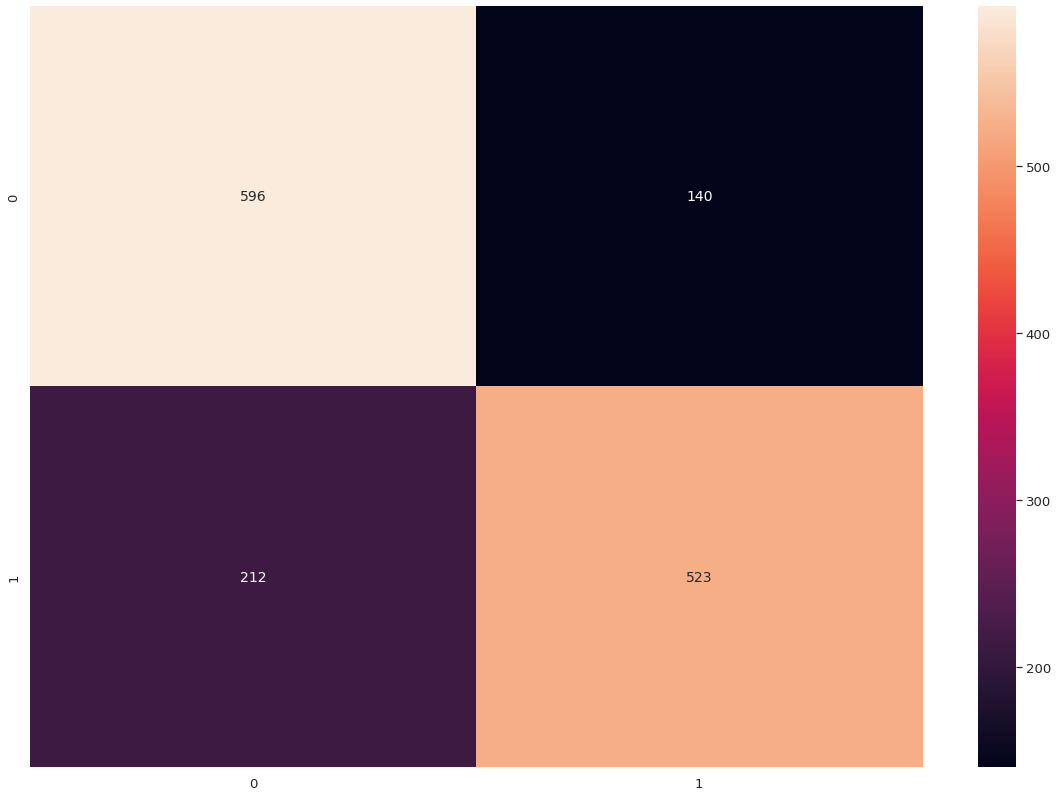

In [ ]:
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(20,14))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='g') # for num predict size

plt.show()

In [ ]:
label_dict = output_tokenizer.word_index

In [ ]:
label = [key for key, value in label_dict.items()]

In [ ]:
print(classification_report(y_true, predicted_classes, target_names=label, digits=4))

              precision    recall  f1-score   support

ไม่เดือดร้อน     0.7376    0.8098    0.7720       736
   เดือดร้อน     0.7888    0.7116    0.7482       735

    accuracy                         0.7607      1471
   macro avg     0.7632    0.7607    0.7601      1471
weighted avg     0.7632    0.7607    0.7601      1471



In [ ]:
sentences = [st.split() for st in cleaned_words]

In [ ]:
w2v_model = Word2Vec(sentences, min_count=1, size=DIMENSION, workers=6, sg=1, iter=500)

In [ ]:
w2v_model.save('w2v_model.bin')

In [ ]:
new_model = Word2Vec.load('w2v_model.bin')

In [ ]:
embedding_matrix = np.zeros((vocab_size, DIMENSION))

for word, i in train_word_tokenizer.word_index.items():
    if word in new_model.wv.vocab:
        embedding_vector = new_model.wv[word]
        embedding_matrix[i] = embedding_vector

In [ ]:
# define the model
def define_w2v_model(length, vocab_size, embedding_matrix):
    # channel 1
    inputs1 = tf.keras.layers.Input(shape=(length,))
    embedding1 = tf.keras.layers.Embedding(vocab_size, DIMENSION, trainable = False, weights=[embedding_matrix])(inputs1)
    conv1 = tf.keras.layers.Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
    drop1 = tf.keras.layers.Dropout(0.5)(conv1)
    pool1 = tf.keras.layers.MaxPooling1D(pool_size=2)(drop1)
    flat1 = tf.keras.layers.Flatten()(pool1)
    # channel 2
    inputs2 = tf.keras.layers.Input(shape=(length,))
    embedding2 = tf.keras.layers.Embedding(vocab_size, DIMENSION, trainable = False, weights=[embedding_matrix])(inputs2)
    conv2 = tf.keras.layers.Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
    drop2 = tf.keras.layers.Dropout(0.5)(conv2)
    pool2 = tf.keras.layers.MaxPooling1D(pool_size=2)(drop2)
    flat2 = tf.keras.layers.Flatten()(pool2)
    # channel 3
    inputs3 = tf.keras.layers.Input(shape=(length,))
    embedding3 = tf.keras.layers.Embedding(vocab_size, DIMENSION, trainable = False, weights=[embedding_matrix])(inputs3)
    conv3 = tf.keras.layers.Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
    drop3 = tf.keras.layers.Dropout(0.5)(conv3)
    pool3 = tf.keras.layers.MaxPooling1D(pool_size=2)(drop3)
    flat3 = tf.keras.layers.Flatten()(pool3)
    # merge
    merged = tf.keras.layers.concatenate([flat1, flat2, flat3])
    # interpretation
    dense1 = tf.keras.layers.Dense(10, activation='relu')(merged)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # compile
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    # summarize
    print(model.summary())
#     plot_model(model, show_shapes=True, to_file='multichannel.png')
    return model

In [ ]:
model2 = define_w2v_model(max_length, vocab_size, embedding_matrix)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 128, 100)     2269800     ['input_4[0][0]']                
                                                                                            

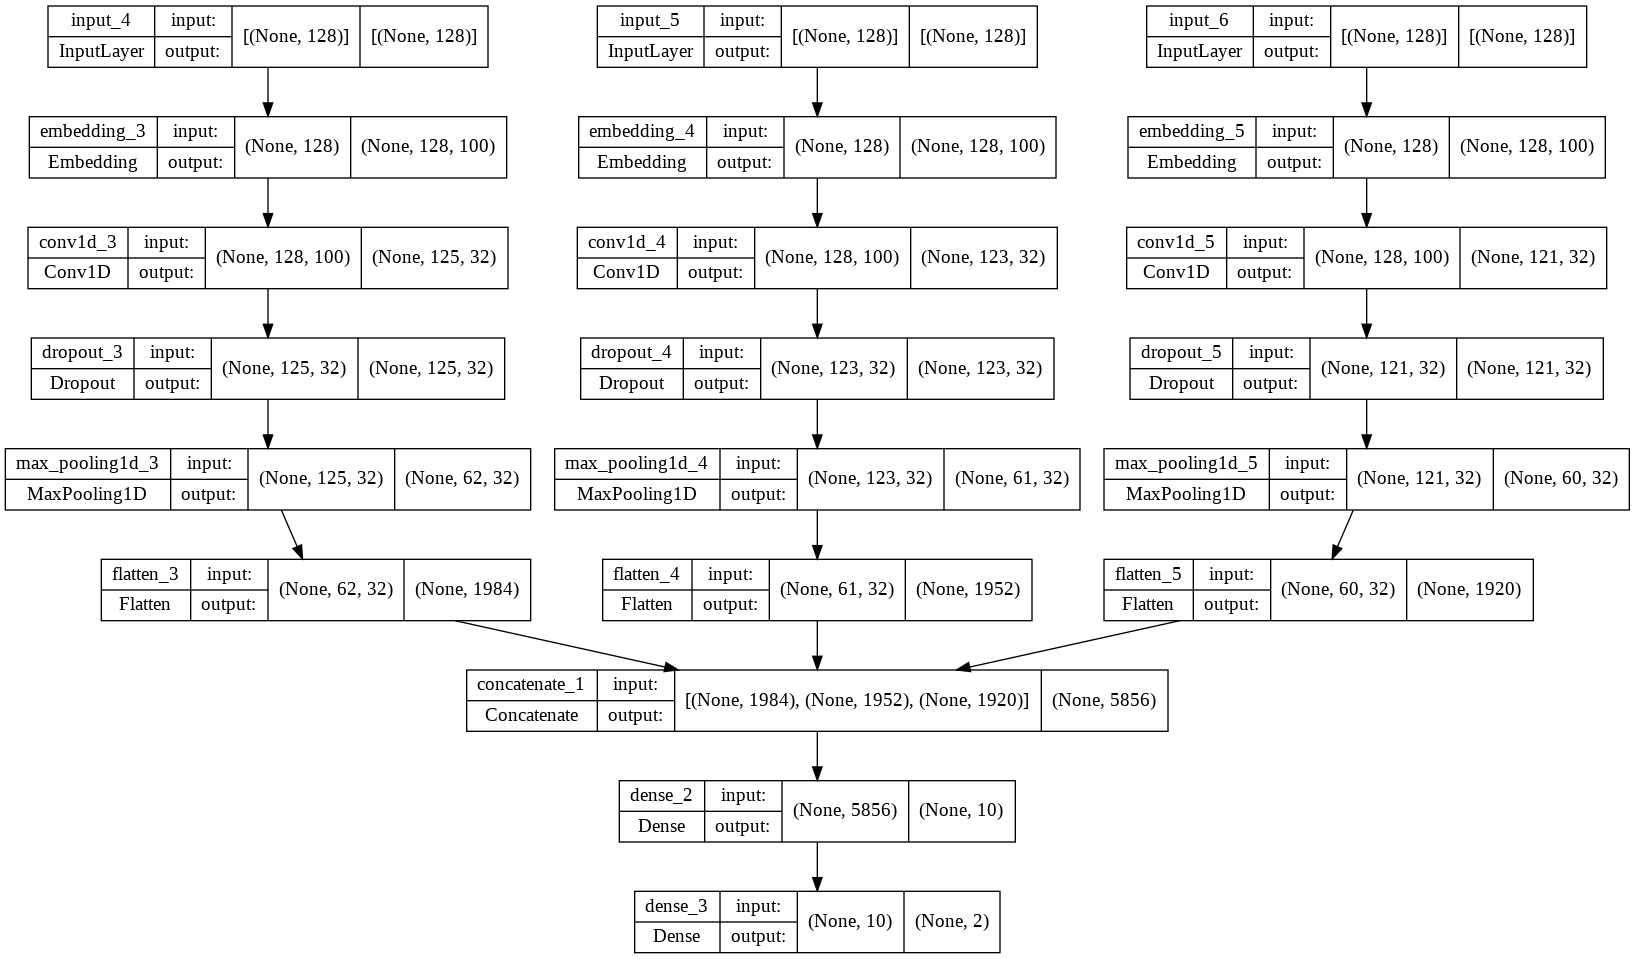

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
filename = 'model2.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience = 3, verbose=1,factor=0.1, min_lr=0.000001)
callbacks_list = [checkpoint, learning_rate_reduction]

In [ ]:
hist2 = model2.fit([train_X, train_X, train_X], train_Y, epochs = EPOCHS, batch_size = BS, validation_data = ([val_X, val_X, val_X], val_Y), callbacks = [callbacks_list], shuffle=True)

Epoch 1/500
178/184 [============================>.] - ETA: 0s - loss: 0.7288 - accuracy: 0.5065
Epoch 1: val_loss improved from inf to 0.69219, saving model to model2.h5
184/184 [==============================] - 2s 7ms/step - loss: 0.7280 - accuracy: 0.5077 - val_loss: 0.6922 - val_accuracy: 0.5391 - lr: 1.0000e-06
Epoch 2/500
180/184 [============================>.] - ETA: 0s - loss: 0.7120 - accuracy: 0.5252
Epoch 2: val_loss improved from 0.69219 to 0.68673, saving model to model2.h5
184/184 [==============================] - 1s 6ms/step - loss: 0.7119 - accuracy: 0.5252 - val_loss: 0.6867 - val_accuracy: 0.5479 - lr: 1.0000e-06
Epoch 3/500
174/184 [===========================>..] - ETA: 0s - loss: 0.7102 - accuracy: 0.5208
Epoch 3: val_loss improved from 0.68673 to 0.68268, saving model to model2.h5
184/184 [==============================] - 1s 6ms/step - loss: 0.7093 - accuracy: 0.5222 - val_loss: 0.6827 - val_accuracy: 0.5561 - lr: 1.0000e-06
Epoch 4/500
173/184 [==============

In [ ]:
h1 = go.Scatter(y=hist2.history['loss'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=hist2.history['val_loss'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
h1 = go.Scatter(y=hist2.history['accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=hist2.history['val_accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
fig1.show()

In [ ]:
predict_model2 = load_model(filename) 
predict_model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 128, 100)     2269800     ['input_4[0][0]']                
                                                                                            

In [ ]:
score = predict_model2.evaluate([val_X, val_X, val_X], val_Y, verbose=0)
print('Validate loss:', score[0])
print('Validate accuracy:', score[1])

Validate loss: 0.5234794616699219
Validate accuracy: 0.7477906346321106


In [ ]:
predicted_classes = np.argmax(predict_model2.predict([val_X, val_X, val_X]), axis=-1)
predicted_classes.shape

(1471,)

In [ ]:
(1720,)

cm = confusion_matrix(y_true, predicted_classes)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")

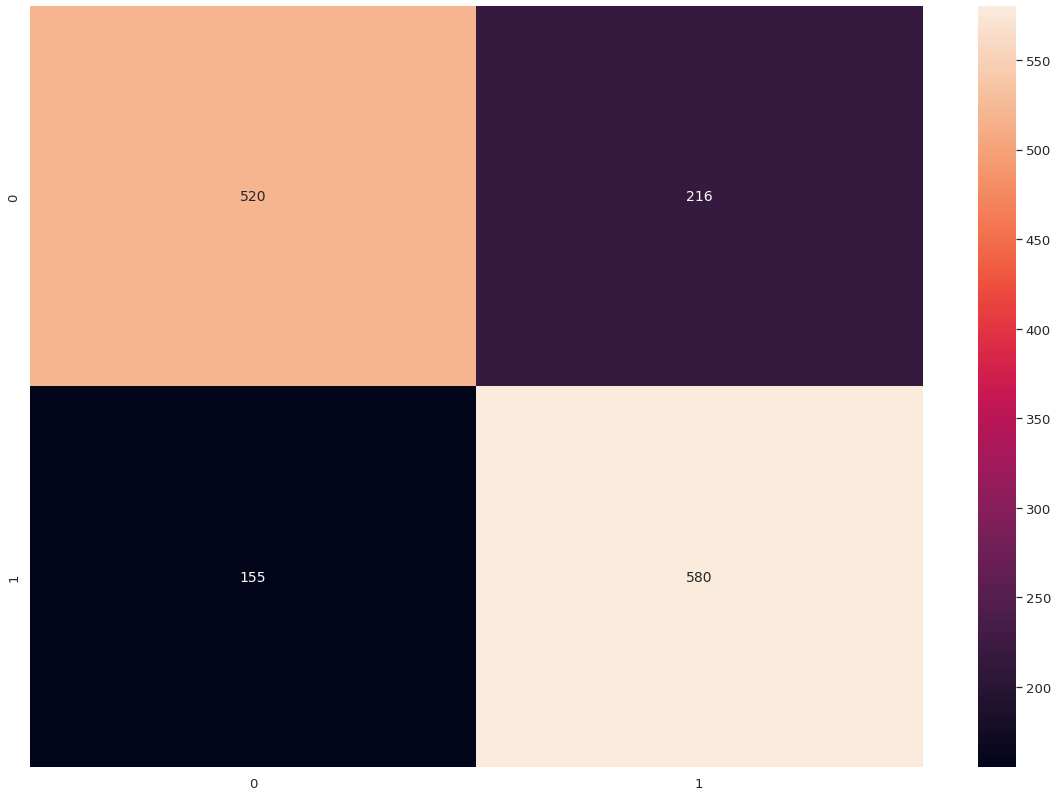

In [ ]:
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(20,14))
sn.set(font_scale=1.2) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt='g') # for num predict size

plt.show()

In [ ]:
print(classification_report(y_true, predicted_classes, target_names=label, digits=4))

              precision    recall  f1-score   support

ไม่เดือดร้อน     0.7704    0.7065    0.7371       736
   เดือดร้อน     0.7286    0.7891    0.7577       735

    accuracy                         0.7478      1471
   macro avg     0.7495    0.7478    0.7474      1471
weighted avg     0.7495    0.7478    0.7474      1471

